# Exploration of Structure-Aware Line Segment Classification

[Link to the slides](https://docs.google.com/presentation/d/1a_c7ad2dueD3v1S-io3ree2PZ7l1lJwAjxdZ9Dhj0NY/edit#slide=id.g1bb67da435b_0_13)

### Imports

In [ ]:
#install PIL
!pip install Pillow


## Next steps :
- Implement script to download wireframe dataset
- Implement Dataloader
- Implement Model

### Download Wireframe Dataset

Download the dataset ([link](https://onedrive.live.com/?authkey=%21AGPMjJtoh%5FIn5l8&id=FD0F423C6AB601A4%217290&cid=FD0F423C6AB601A4))
and place it in the `wireframe_dataset` folder.

In [32]:
import pickle
import cv2
import matplotlib.pyplot as plt
import os

- Data Structure  
    Each .pkl file contains the annotated wireframe of an image, and it consists of the following variables:  
    ```shell
    *.pkl  
        |-- imagename: 	the name of the image  
        |-- img:         the image data  
        |-- points:      the set of points in the wireframe, each point is represented by its (x,y)-coordinates in the image  
        |-- lines:       the set of lines in the wireframe, each line is represented by the indices of its two end-points  
        |-- pointlines:     the set of associated lines of each point        
        |-- pointlines_index:       line indexes of lines in 'pointlines'  
        |-- junction:       the junction locations, derived from the 'points' and 'lines'  
        |-- theta:      the angle values of branches of each junction                   
    ```

In [29]:
data_path = 'wireframe_dataset/pointlines/'
def load_img_points(idx):
    filename = data_path + f'{idx}.pkl'
    infile = open(filename,'rb')
    new_dict = pickle.load(infile)
    infile.close()

    im = new_dict['img']
    lines = new_dict['lines']
    points = new_dict['points']

    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    return im, lines, points

In [30]:
def print_original_and_image_with_line(lines, points, im):
    imb_before = im.copy()
    for idx, (i, j) in enumerate(lines, start=0):
     x1, y1 = points[i]
     x2, y2 = points[j]
     cv2.line(im, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2, cv2.LINE_8)

    # Plot the image
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(imb_before)
    ax1.set_title('Original Image')
    ax2.imshow(im)
    ax2.set_title('Image with lines')
    plt.show()

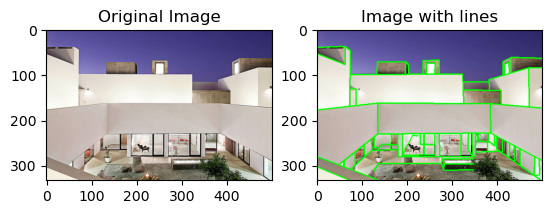

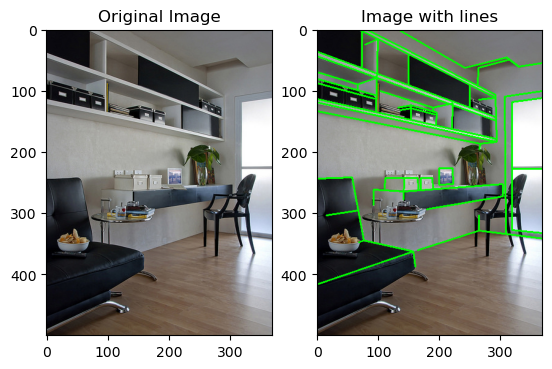

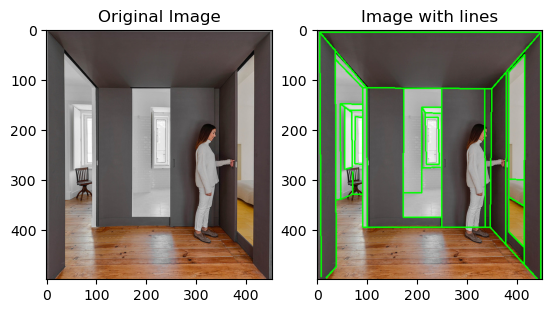

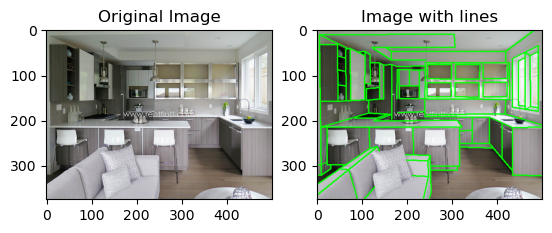

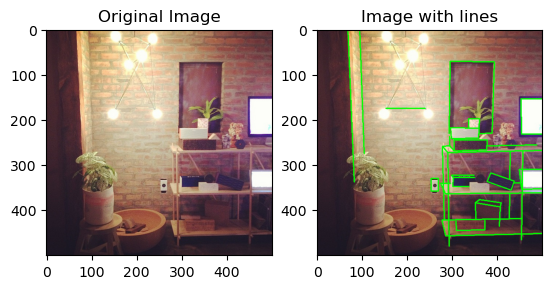

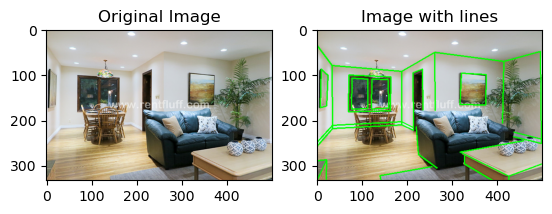

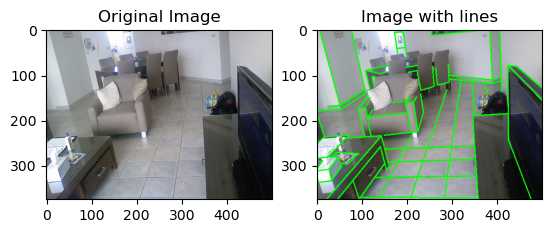

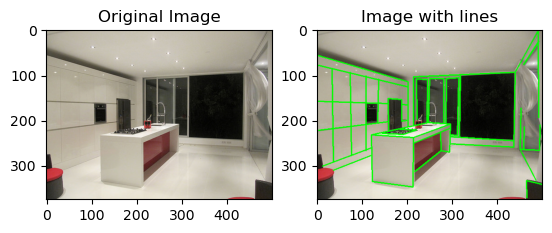

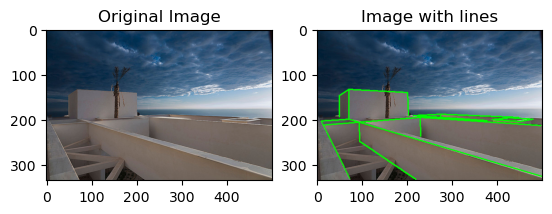

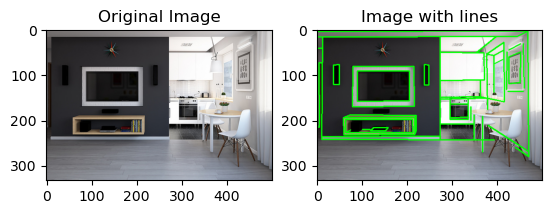

In [37]:
for file in os.listdir(data_path)[:10]:
    id = file.split('.')[0]
    im, lines, points = load_img_points(id)
    print_original_and_image_with_line(lines, points, im)


In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

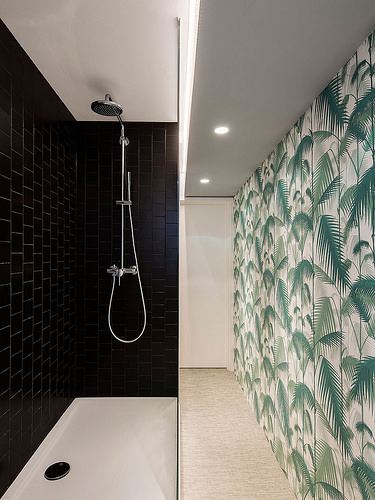

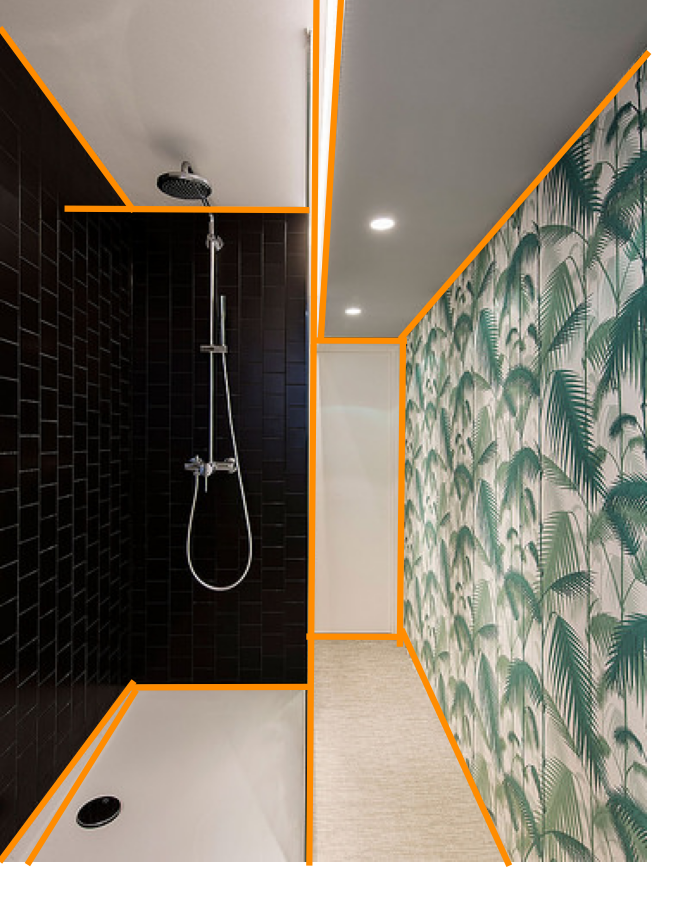

In [20]:
from IPython.display import display
from PIL import Image
demo_img = Image.open('demo/demo.png')
letr_result = Image.open('demo/demo_letr_result.png')
display(demo_img)
display(letr_result)
images = [] # list of images we use as input
images.append(demo_img)

#### Preprocessing

In [21]:
#resize images
input_dimension_x = 512
input_dimension_y = 512
for image in images:
    image = letr_result.resize((input_dimension_x, input_dimension_y), Image.ANTIALIAS) #antialiasing to avoid pixelation


### Models 

In [27]:
#simple cnn classification
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax')) #softmax for classification
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 255, 255, 32)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 124, 124, 64)      36928     
                                                                 
 flatten_3 (Flatten)         (None, 984064)           

In [28]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy', 'f1_score'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

#### Stacking LSD with LETR models -> allows for textural classification as well
#### Using new model using LETR for creating the dataset.

In [ ]:
#Using the Wireframe dataset (that already has structural lines detected) LETR for structural line detection. 